In [6]:
import tensorflow as tf

In [10]:
base_model=tf.keras.applications.resnet.ResNet101(
         include_top=False,
         weights=None,
         input_shape=(224,224,3)
)

In [11]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [12]:
model=Sequential()
model.add(base_model)
model.add(Flatten())

In [13]:
import cv2
import glob
import numpy as np

In [14]:
def get_convfeatures(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    return model.predict(np.array([img]))

In [15]:
get_convfeatures("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/10.jpg").shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(1, 100352)

In [16]:
features=[]
names=[]

In [17]:
for path in glob.glob("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/*.jpg"):
    features.append(get_convfeatures(path).reshape(-1))
    names.append(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
features=np.array(features)
names=np.array(names)

In [19]:
input_vector=get_convfeatures("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/23.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [20]:
from scipy import spatial
input_vector = np.squeeze(input_vector)

In [21]:
dist=np.array([spatial.distance.cosine(input_vector,i) for i in features])

In [22]:
min_index=dist.argsort()[:3]

In [23]:
names[min_index]

array(['/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/23.jpg',
       '/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/423-east.jpg',
       '/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/545.jpg'],
      dtype='<U81')

In [24]:
import matplotlib.pyplot as plt

In [25]:
def imshow(img):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    ax.imshow(img)
    plt.show()

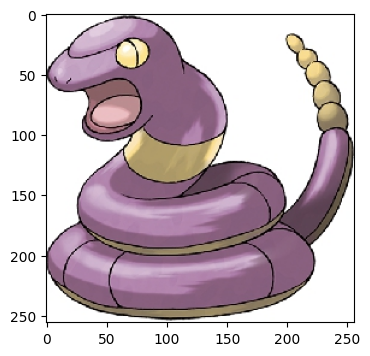

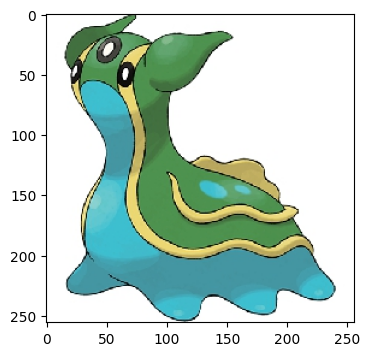

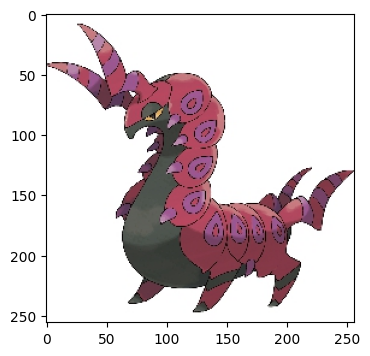

In [26]:
for i in names[min_index]:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imshow(img)